# ПЕРВИННІ НАЛАШТУВАННЯ

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional

In [2]:
def plot_result(data):
  history_dict = data.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim(0, 1.)
  plt.legend()
  plt.show()

  plt.clf()
  val_acc_values = history_dict['val_accuracy']
  plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
  plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim(0.7, 1.0)
  plt.legend()

In [3]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [4]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

# МОДЕЛЬ RNN

In [6]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, maxlen))
model.summary()

history_RNN = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - accuracy: 0.5758 - loss: 0.6655 - val_accuracy: 0.7003 - val_loss: 0.5655
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.8088 - loss: 0.4390 - val_accuracy: 0.8355 - val_loss: 0.3939
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.8652 - loss: 0.3346 - val_accuracy: 0.8351 - val_loss: 0.3892
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.8860 - loss: 0.2852 - val_accuracy: 0.8488 - val_loss: 0.3713
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9221 - loss: 0.2108 - val_accuracy: 0.8283 - val_loss: 0.4074
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9449 - loss: 0.1565 - val_accuracy: 0.8537 - val_loss: 0.4227
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.9623 - loss: 0.1096 - val_accuracy: 0.7835 - val_loss: 0.5720
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9725 - loss: 0.0883 - val_

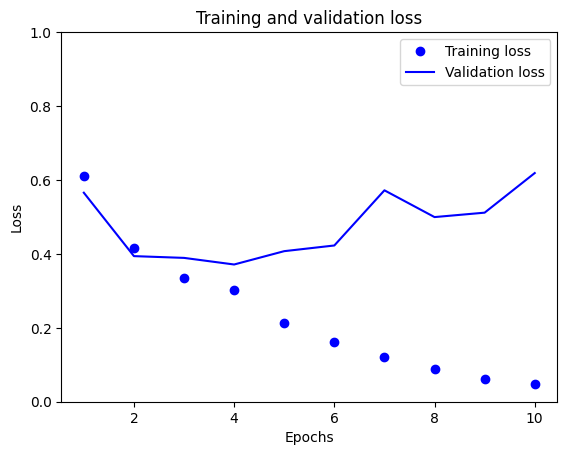

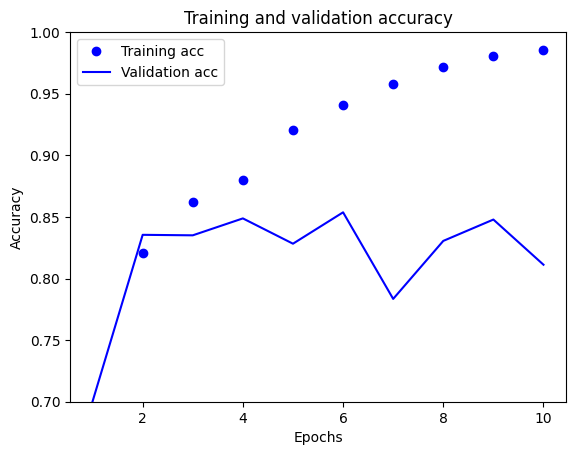

In [7]:
plot_result(history_RNN)

# МОДЕЛЬ LSTM

In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, maxlen))
model.summary()

history_LSTM = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5653 - loss: 0.6732 - val_accuracy: 0.7976 - val_loss: 0.4648
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8071 - loss: 0.4439 - val_accuracy: 0.8599 - val_loss: 0.3446
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8587 - loss: 0.3472 - val_accuracy: 0.8507 - val_loss: 0.3542
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8813 - loss: 0.2996 - val_accuracy: 0.8627 - val_loss: 0.3295
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8910 - loss: 0.2780 - val_accuracy: 0.8755 - val_loss: 0.2986
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8960 - loss: 0.2738 - val_accuracy: 0.8805 - val_loss: 0.2981
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9178 - loss: 0.2220 - val_accuracy: 0.8537 - val_loss: 0.3563
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9280 - loss: 0.1996 - val_accu

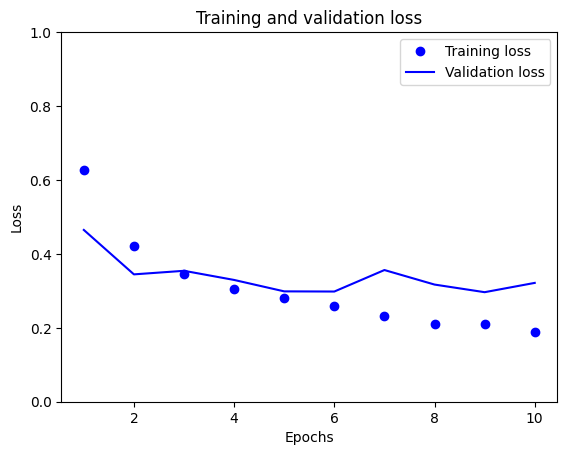

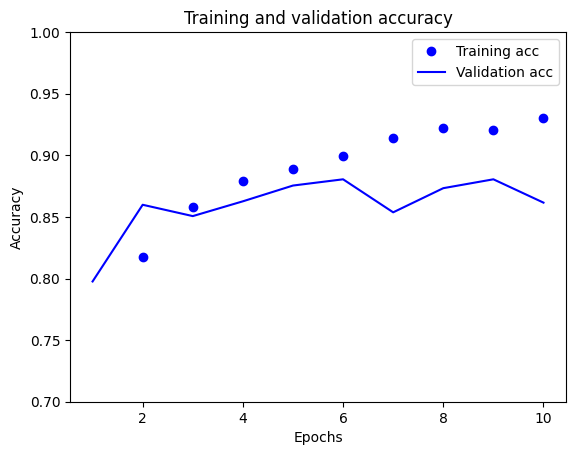

In [9]:
plot_result(history_LSTM)

# МОДЕЛЬ BRNN

In [10]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(SimpleRNN(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, maxlen))
model.summary()

history_BRNN = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 324,225 (1.24 MB)

 Trainable params: 324,225 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 47s 315ms/step - accuracy: 0.5109 - loss: 0.6946 - val_accuracy: 0.5785 - val_loss: 0.6706
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 296ms/step - accuracy: 0.6941 - loss: 0.5975 - val_accuracy: 0.7804 - val_loss: 0.4836
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - accuracy: 0.8350 - loss: 0.3960 - val_accuracy: 0.8227 - val_loss: 0.4103
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 291ms/step - accuracy: 0.8859 - loss: 0.2844 - val_accuracy: 0.8204 - val_loss: 0.4174
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 29s 213ms/step - accuracy: 0.9317 - loss: 0.1866 - val_accuracy: 0.8265 - val_loss: 0.4316
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 245ms/step - accuracy: 0.9579 - loss: 0.1216 - val_accuracy: 0.7673 - val_loss: 0.5715
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.9762 - loss: 0.0776 - val_accuracy: 0.8392 - val_loss: 0.4873
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 31s 229ms/step - accuracy: 0.9884 - loss: 0

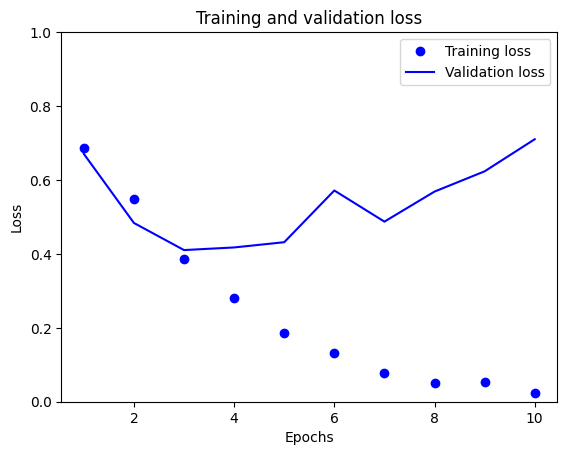

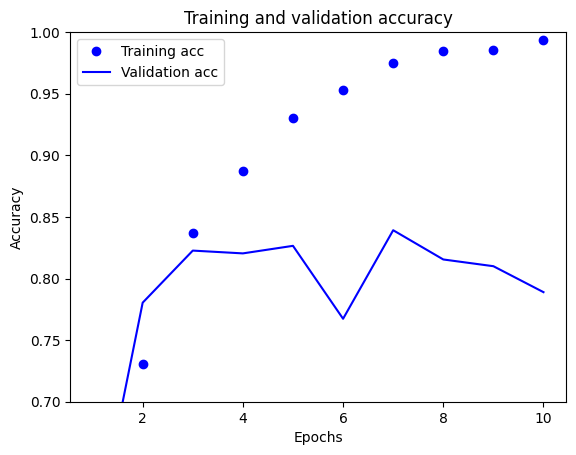

In [11]:
plot_result(history_BRNN)

# МОДЕЛЬ DRNN

In [12]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, maxlen))
model.summary()

history_DRNN = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 500, 64)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,537 (1.38 MB)

 Trainable params: 361,537 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.5376 - loss: 0.6829 - val_accuracy: 0.7863 - val_loss: 0.4706
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.8009 - loss: 0.4478 - val_accuracy: 0.8192 - val_loss: 0.4146
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8517 - loss: 0.3555 - val_accuracy: 0.8677 - val_loss: 0.3175
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8766 - loss: 0.3089 - val_accuracy: 0.8231 - val_loss: 0.4070
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9003 - loss: 0.2585 - val_accuracy: 0.8473 - val_loss: 0.4048
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.9168 - loss: 0.2195 - val_accuracy: 0.8159 - val_loss: 0.4966
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.9221 - loss: 0.2092 - val_accuracy: 0.8721 - val_loss: 0.3293
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9427 - loss: 0.1663 - val_acc

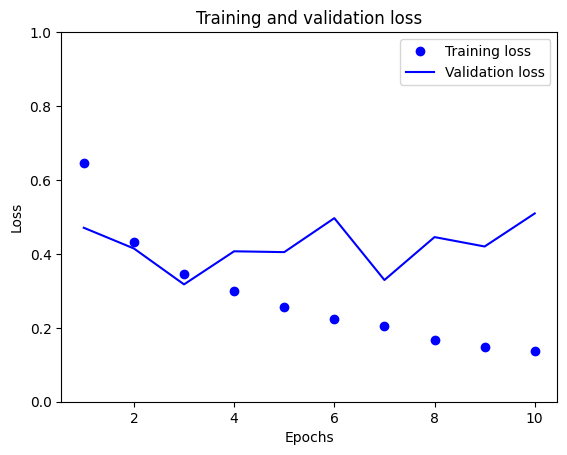

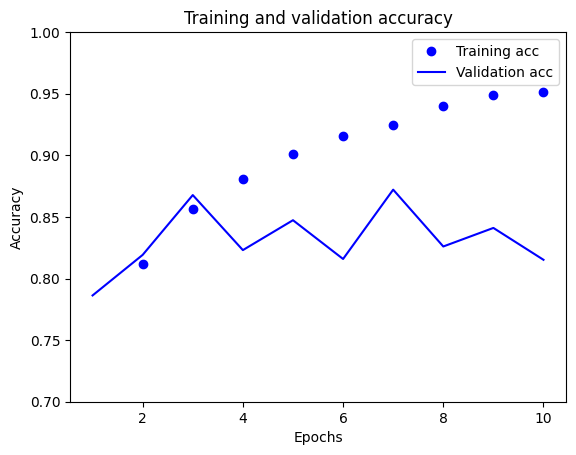

In [13]:
plot_result(history_DRNN)

# ВИСНОВКИ

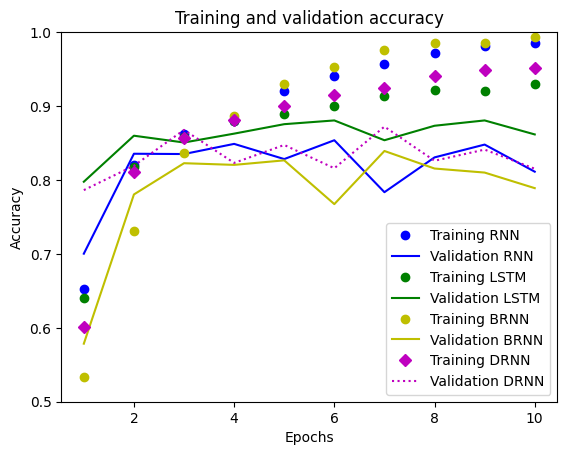

In [14]:
history_dict_RNN = history_RNN.history
history_dict_LSTM = history_LSTM.history
history_dict_BRNN = history_BRNN.history
history_dict_DRNN = history_DRNN.history

epochs = range(1, len(history_dict_RNN['accuracy']) + 1)

plt.plot(epochs, history_dict_RNN['accuracy'], 'bo', label='Training RNN')
plt.plot(epochs, history_dict_RNN['val_accuracy'], 'b', label='Validation RNN')
plt.plot(epochs, history_dict_LSTM['accuracy'], 'go', label='Training LSTM')
plt.plot(epochs, history_dict_LSTM['val_accuracy'], 'g', label='Validation LSTM')
plt.plot(epochs, history_dict_BRNN['accuracy'], 'yo', label='Training BRNN')
plt.plot(epochs, history_dict_BRNN['val_accuracy'], 'y', label='Validation BRNN')
plt.plot(epochs, history_dict_DRNN['accuracy'], 'mD', label='Training DRNN')
plt.plot(epochs, history_dict_DRNN['val_accuracy'], 'm:', label='Validation DRNN')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()

В рамках дослідження роботи різних рекрутних моделей було протестовано кілька основних зберігаючи незмінні гіперпараметри для демонстрації різниці роботи алгоритмів.
Кожна наступна модель вимагала значно більше часу ніж попередня, що виникало з кількості операцій. Тому я відмовився запускати DRNN використовуючи тільки SimpleRNN. Результат є передбачуваним - це призвело б до ще більшого перенавчання.
Аналізуючи по-порядку, проста RNN дала незадовільні результити з очевидним перенавчанням. Точність на тенувальних даних виросла до 0,99 залишивши валідацію далеко позаду.
Модель з використанням LSTM значно покращила ситуацію. Результати тренування і валідації стали значно ближчі, хоча залишились "стрибки". У цьому випадку можна пробувати зменшувати швидкість навчання.
Наступна модель BRNN показала гірші результати. Вона досягла своїх кращих результатів вже на 3 епосі і після цього не покращувалась. Далі відбувалося тільки перенавчання. Це показує, що використання BRNN без LSTM немає ніякого впливу на покращення моделі.
Наступна модель DRNN зібрала у собі всі попередні модифікації. Завдяки цьому вона є найскладнішою моделью з представлених тут і також має найбільшу кількість операцій до виконання.
Як видно з графіку, це зовсім не означає, що DRNN буде однозначно найкращим рішенням для вирішення поставленої задачі.
У висновку, модель RNN з використанням LSTM показала найкращий результат.
